<a href="https://colab.research.google.com/github/My-Abba/calculadora-equipo/blob/main/colab_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Trabajo de Investigación y Desarrollo Práctico: Construcción de una Red Neuronal para Predecir Precios de Viviendas"

# 1.	Investigación teórica

**¿Qué es una red neuronal artificial?**
* Es un modelo de inteligencia artificial inspirado en cómo funciona el cerebro humano. Está formado por "neuronas" conectadas entre sí, que procesan datos y aprenden a reconocer patrones. Se usan mucho en tareas como reconocimiento de imágenes, voz o predicción de resultados.

**¿Qué es una regresión lineal y cómo se aplica en ML?**
* Es un método que se usa para predecir un valor basándose en la relación entre variables. En Machine Learning (ML), la regresión lineal se usa, por ejemplo, para predecir precios (como el de una casa) según características como tamaño, ubicación, etc.

**¿Para qué sirve TensorFlow/Keras en el desarrollo de modelos ML?**
* Son herramientas (librerías) que facilitan la creación y entrenamiento de modelos de Machine Learning y Deep Learning.
  * TensorFlow es muy potente y flexible.
  * Keras es más fácil de usar, ideal para empezar, y funciona encima de TensorFlow.
Sirven para construir desde modelos simples hasta redes neuronales complejas.

**¿Por qué es importante el control de versiones con GitHub?**
* GitHub permite guardar el historial de cambios en tus proyectos, colaborar con otros y evitar errores. Es esencial para:

  * Trabajar en equipo

  * No perder versiones anteriores

  * Tener respaldo del código

  * Ver quién hizo qué y cuándo




# 2.	Preparación del entorno


* 	Instalar Python y los paquetes necesarios: tensorflow, keras, matplotlib, numpy, pandas.

* o	Inicializar un repositorio GitHub y subir un archivo README.md con una breve descripción del proyecto.

# Implementacion Practica



In [2]:
# Montamos Google Drive para leer/escribir archivos
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# IMPORTAR LIBRERIAS Y CARGAR DATOS
 #En Colab, en la siguiente celda instala e importa todo lo que necesitas:
 # Instalar (si hiciera falta) y cargar librerías esenciales
# Ejecuta esto primero en Google Colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# Cargamos el dataset California Housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')  # Valor medio de las viviendas

# Ver los primeros datos
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
# División en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Escalado (media 0, varianza 1) para mejorar el aprendizaje
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [10]:
# Creamos una red neuronal simple con Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),  # Capa oculta con 64 neuronas
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Capa de salida: una predicción (valor de la vivienda)
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Entrenamos el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)


Epoch 1/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.4487 - mae: 0.8407 - val_loss: 0.4686 - val_mae: 0.4797
Epoch 2/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4124 - mae: 0.4543 - val_loss: 0.4098 - val_mae: 0.4418
Epoch 3/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3899 - mae: 0.4355 - val_loss: 0.3922 - val_mae: 0.4370
Epoch 4/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3478 - mae: 0.4199 - val_loss: 0.4386 - val_mae: 0.4524
Epoch 5/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3777 - mae: 0.4260 - val_loss: 0.3574 - val_mae: 0.4162
Epoch 6/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3187 - mae: 0.3972 - val_loss: 0.3710 - val_mae: 0.4241
Epoch 7/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3328 - mae: 0.4034 - val_loss: 0.3711 - val_mae: 0.4190
Epoch 8/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3442 - mae: 0.4013 - val_loss: 0.3448 - val_mae: 0.4006
Epoch 9/50
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [12]:
# Evaluamos en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Error medio absoluto (MAE): {test_mae}")

# Predicción y error cuadrático medio
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")



194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2801 - mae: 0.3493
Error medio absoluto (MAE): 0.35238876938819885
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Error cuadrático medio (MSE): 0.283476060901784


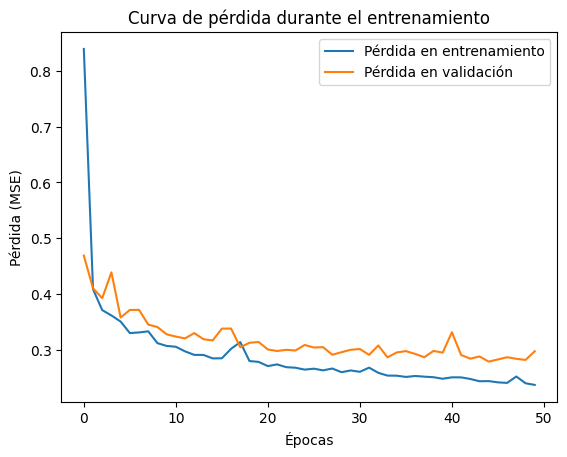

In [13]:
# Visualizamos cómo mejoró el modelo con las épocas
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.title('Curva de pérdida durante el entrenamiento')
plt.show()


194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Índices con error > 1.0: [33, 47, 60, 66, 79, 96, 98, 102, 107, 138, 140, 160, 163, 176, 181, 194, 246, 250, 265, 271, 275, 285, 296, 349, 359, 397, 418, 426, 429, 443, 466, 507, 524, 528, 529, 563, 578, 580, 617, 625, 641, 645, 683, 712, 716, 720, 724, 729, 737, 751, 762, 785, 802, 811, 850, 860, 871, 872, 893, 899, 906, 911, 953, 954, 982, 989, 999, 1017, 1030, 1031, 1045, 1049, 1065, 1069, 1114, 1116, 1124, 1128, 1138, 1140, 1141, 1166, 1190, 1199, 1205, 1244, 1250, 1253, 1258, 1261, 1299, 1300, 1303, 1321, 1382, 1387, 1389, 1393, 1400, 1406, 1408, 1418, 1468, 1469, 1475, 1481, 1509, 1552, 1564, 1569, 1605, 1613, 1625, 1626, 1649, 1655, 1693, 1713, 1731, 1738, 1756, 1786, 1788, 1818, 1848, 1865, 1869, 1897, 1912, 1914, 1926, 1931, 1932, 1934, 1954, 1980, 2034, 2036, 2047, 2056, 2067, 2086, 2102, 2118, 2121, 2168, 2176, 2177, 2185, 2186, 2218, 2225, 2231, 2234, 2236, 2246, 2247, 2250, 2285, 2288, 2355, 2361, 2395, 2431, 2443, 2470, 2487, 2497,

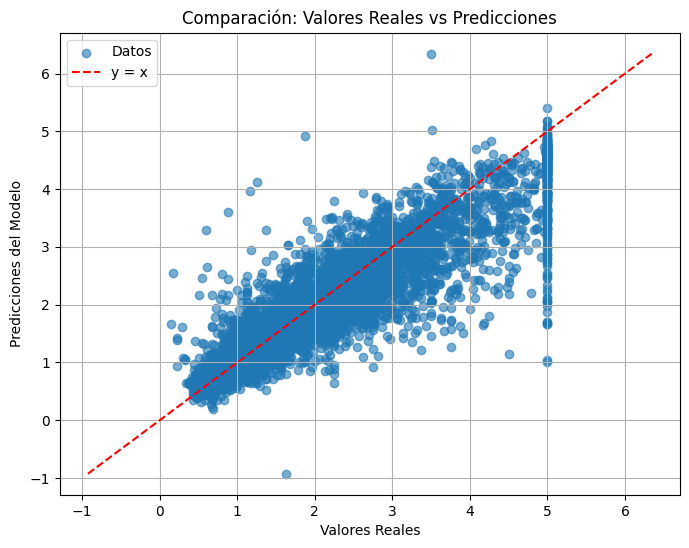

In [14]:
# Predicción
y_pred = model.predict(X_test_scaled).flatten()

# Convertimos a listas
predictions_list = y_pred.tolist()
real_list = y_test.tolist()

# Diccionario de resultados
results_dict = {
    'real': real_list,
    'pred': predictions_list
}

# Array de errores
errors_array = np.array(real_list) - np.array(predictions_list)

# Bucle y condicional para errores grandes
high_error_indices = []
threshold = 1.0
for idx, err in enumerate(errors_array):
    if abs(err) > threshold:
        high_error_indices.append(idx)

print(f"Índices con error > {threshold}: {high_error_indices}")

# Gráfico de resultados
plt.figure(figsize=(8,6))
plt.scatter(real_list, predictions_list, alpha=0.6, label='Datos')
min_val = min(real_list + predictions_list)
max_val = max(real_list + predictions_list)
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='y = x')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Comparación: Valores Reales vs Predicciones')
plt.legend()
plt.grid(True)
plt.show()
